# Load libaries

In [1]:
library(ggplot2) ##plotting package
library(cowplot) ##plots + arrange plots etc
library(data.table) ## load files into R faster
library(R.utils) ## load .gz files within fread

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.25.0 (2022-06-12 02:20:02 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.12.0 (2022-06-28 03:20:05 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, warnings




# Load data
## Counts

In [2]:
gn_bdr_tpm_updated_df_trunc <- data.table::fread('/Users/rusi2317/projects/DBNascent_Analysis/data/final_counts/genes_5ptrunc_bidirectionals_tpm500bp_promoters.tsv.gz')
dim(gn_bdr_tpm_updated_df_trunc)
head(gn_bdr_tpm_updated_df_trunc)


[1] 284441    893

chromosome,start,end,GeneID,Length,SRZ1950491,SRZ1950493,SRZ1950495,SRZ1950497,SRZ1950499,⋯,SRR11793829,SRR11793830,stdev,variance,mean,median,coefvar,max,bidir,bidir_id
<chr>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
chr1,77562416,77681908,ZZZ3,119493,5.82945457,8.3145779,5.980257048,6.282368367,6.34099874,⋯,0.5279793,4.530625,4.004108,16.032880,6.242682,5.6444509,0.6414082,36.13679,,Gene
chr17,4004445,4142280,ZZEF1,137836,2.96570797,3.6729336,3.443278075,3.309437669,3.71085744,⋯,0.4787957,2.945369,2.723936,7.419826,4.139845,3.6015431,0.6579801,18.42629,,Gene
chr7,143382095,143391111,ZYX,9017,1.32486628,0.9145094,0.362819651,0.495713321,0.84116989,⋯,1.3579248,6.731350,19.013528,361.514236,14.768354,8.2922904,1.2874507,185.82795,,Gene
chr1,52727203,52827336,ZYG11B,100134,2.26242489,2.5953030,1.638250776,1.865425871,2.23744361,⋯,0.4362710,2.877564,2.096393,4.394865,2.540616,2.0888459,0.8251515,21.45492,,Gene
chr1,52843510,52894995,ZYG11A,51486,0.02531241,0.0000000,0.009077488,0.009138605,0.01133218,⋯,0.8061700,4.896948,3.290928,10.830205,2.180554,0.9981141,1.5092163,28.23736,,Gene
chr3,126458901,126475169,ZXDC,16269,4.43249906,5.1300536,4.639449997,4.063352682,5.31961664,⋯,0.4400926,3.607818,5.499086,30.239947,8.319729,7.1572096,0.6609694,53.80431,,Gene


## Metadata


In [3]:
##fxn to convert the first letter to uppercase
first_letter_uppper <- function(x) {
  substr(x, 1, 1) <- toupper(substr(x, 1, 1))
  return(x)
}

In [4]:
metadata_celltype <- data.table::fread('/Users/rusi2317/projects/DBNascent-build/230131_db_output.tsv')
metadata_celltype$Tissue <- first_letter_uppper(metadata_celltype$tissue)
dim(metadata_celltype)
head(metadata_celltype)

[1] 2880   15

organism,tissue,tissue_description,disease,srp,paper_id,protocol,sample_name,sample_type,cell_type,samp_qc_score,samp_data_score,replicate,control_experimental,Tissue
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
A. thaliana,seed,seed,0,SRP076266,Hetzel2016nascent,GRO-cap,SRR3647033,tissue,seed,3,1,1,control,Seed
A. thaliana,seed,seed,0,SRP076266,Hetzel2016nascent,GRO-seq,SRR3647034,tissue,seed,4,1,1,control,Seed
A. thaliana,seed,seed,0,SRP076266,Hetzel2016nascent,GRO-seq,SRR3647035,tissue,seed,3,1,2,control,Seed
A. thaliana,seedling,seedling,0,SRP101403,Liu2018arabidopsis,GRO-seq,SRR5313794,tissue,seedling,5,1,1,experimental,Seedling
A. thaliana,seedling,seedling,0,SRP101403,Liu2018arabidopsis,GRO-seq,SRR5313795,tissue,seedling,4,1,2,experimental,Seedling
A. thaliana,seedling,seedling,0,SRP101403,Liu2018arabidopsis,GRO-seq,SRR5313796,tissue,seedling,4,1,1,control,Seedling


# Tissues and cell types summary

In [5]:
sample_ids <- colnames(gn_bdr_tpm_updated_df_trunc[,6:885])
length(sample_ids)
head(sample_ids, 3)

[1] 880

[1] "SRZ1950491" "SRZ1950493" "SRZ1950495"

In [6]:
metadata_celltype_counted <- metadata_celltype[metadata_celltype$sample_name %in% sample_ids,]
dim(metadata_celltype_counted)
head(metadata_celltype_counted)

[1] 880  15

organism,tissue,tissue_description,disease,srp,paper_id,protocol,sample_name,sample_type,cell_type,samp_qc_score,samp_data_score,replicate,control_experimental,Tissue
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
H. sapiens,blood,blood; biphenotypic B myelomonocytic leukemia,1,SRP149838,Aho2019displacement,PRO-seq,SRR7266931,cell line,MV4-11,1,2,1,control,Blood
H. sapiens,blood,blood; biphenotypic B myelomonocytic leukemia,1,SRP149838,Aho2019displacement,PRO-seq,SRR7266932,cell line,MV4-11,2,1,2,control,Blood
H. sapiens,blood,blood; biphenotypic B myelomonocytic leukemia,1,SRP149838,Aho2019displacement,PRO-seq,SRR7266933,cell line,MV4-11,1,2,1,experimental,Blood
H. sapiens,blood,blood; biphenotypic B myelomonocytic leukemia,1,SRP149838,Aho2019displacement,PRO-seq,SRR7266934,cell line,MV4-11,1,2,2,experimental,Blood
H. sapiens,blood,blood; biphenotypic B myelomonocytic leukemia,1,SRP149838,Aho2019displacement,PRO-seq,SRR7266935,cell line,MV4-11,1,2,1,experimental,Blood
H. sapiens,blood,blood; biphenotypic B myelomonocytic leukemia,1,SRP149838,Aho2019displacement,PRO-seq,SRR7266936,cell line,MV4-11,1,2,2,experimental,Blood


## Cell types

In [7]:
filtered_samples_celltype <- as.data.frame(table(as.character(metadata_celltype_counted$cell_type)))
filtered_samples_celltype

Var1,Freq
<fct>,<int>
A2780,6
A375,9
A549,8
acute myeloid leukemia cell,2
ARPE-19,1
B cell,3
BEAS-2B,2
BJ,2
BJ5ta,2


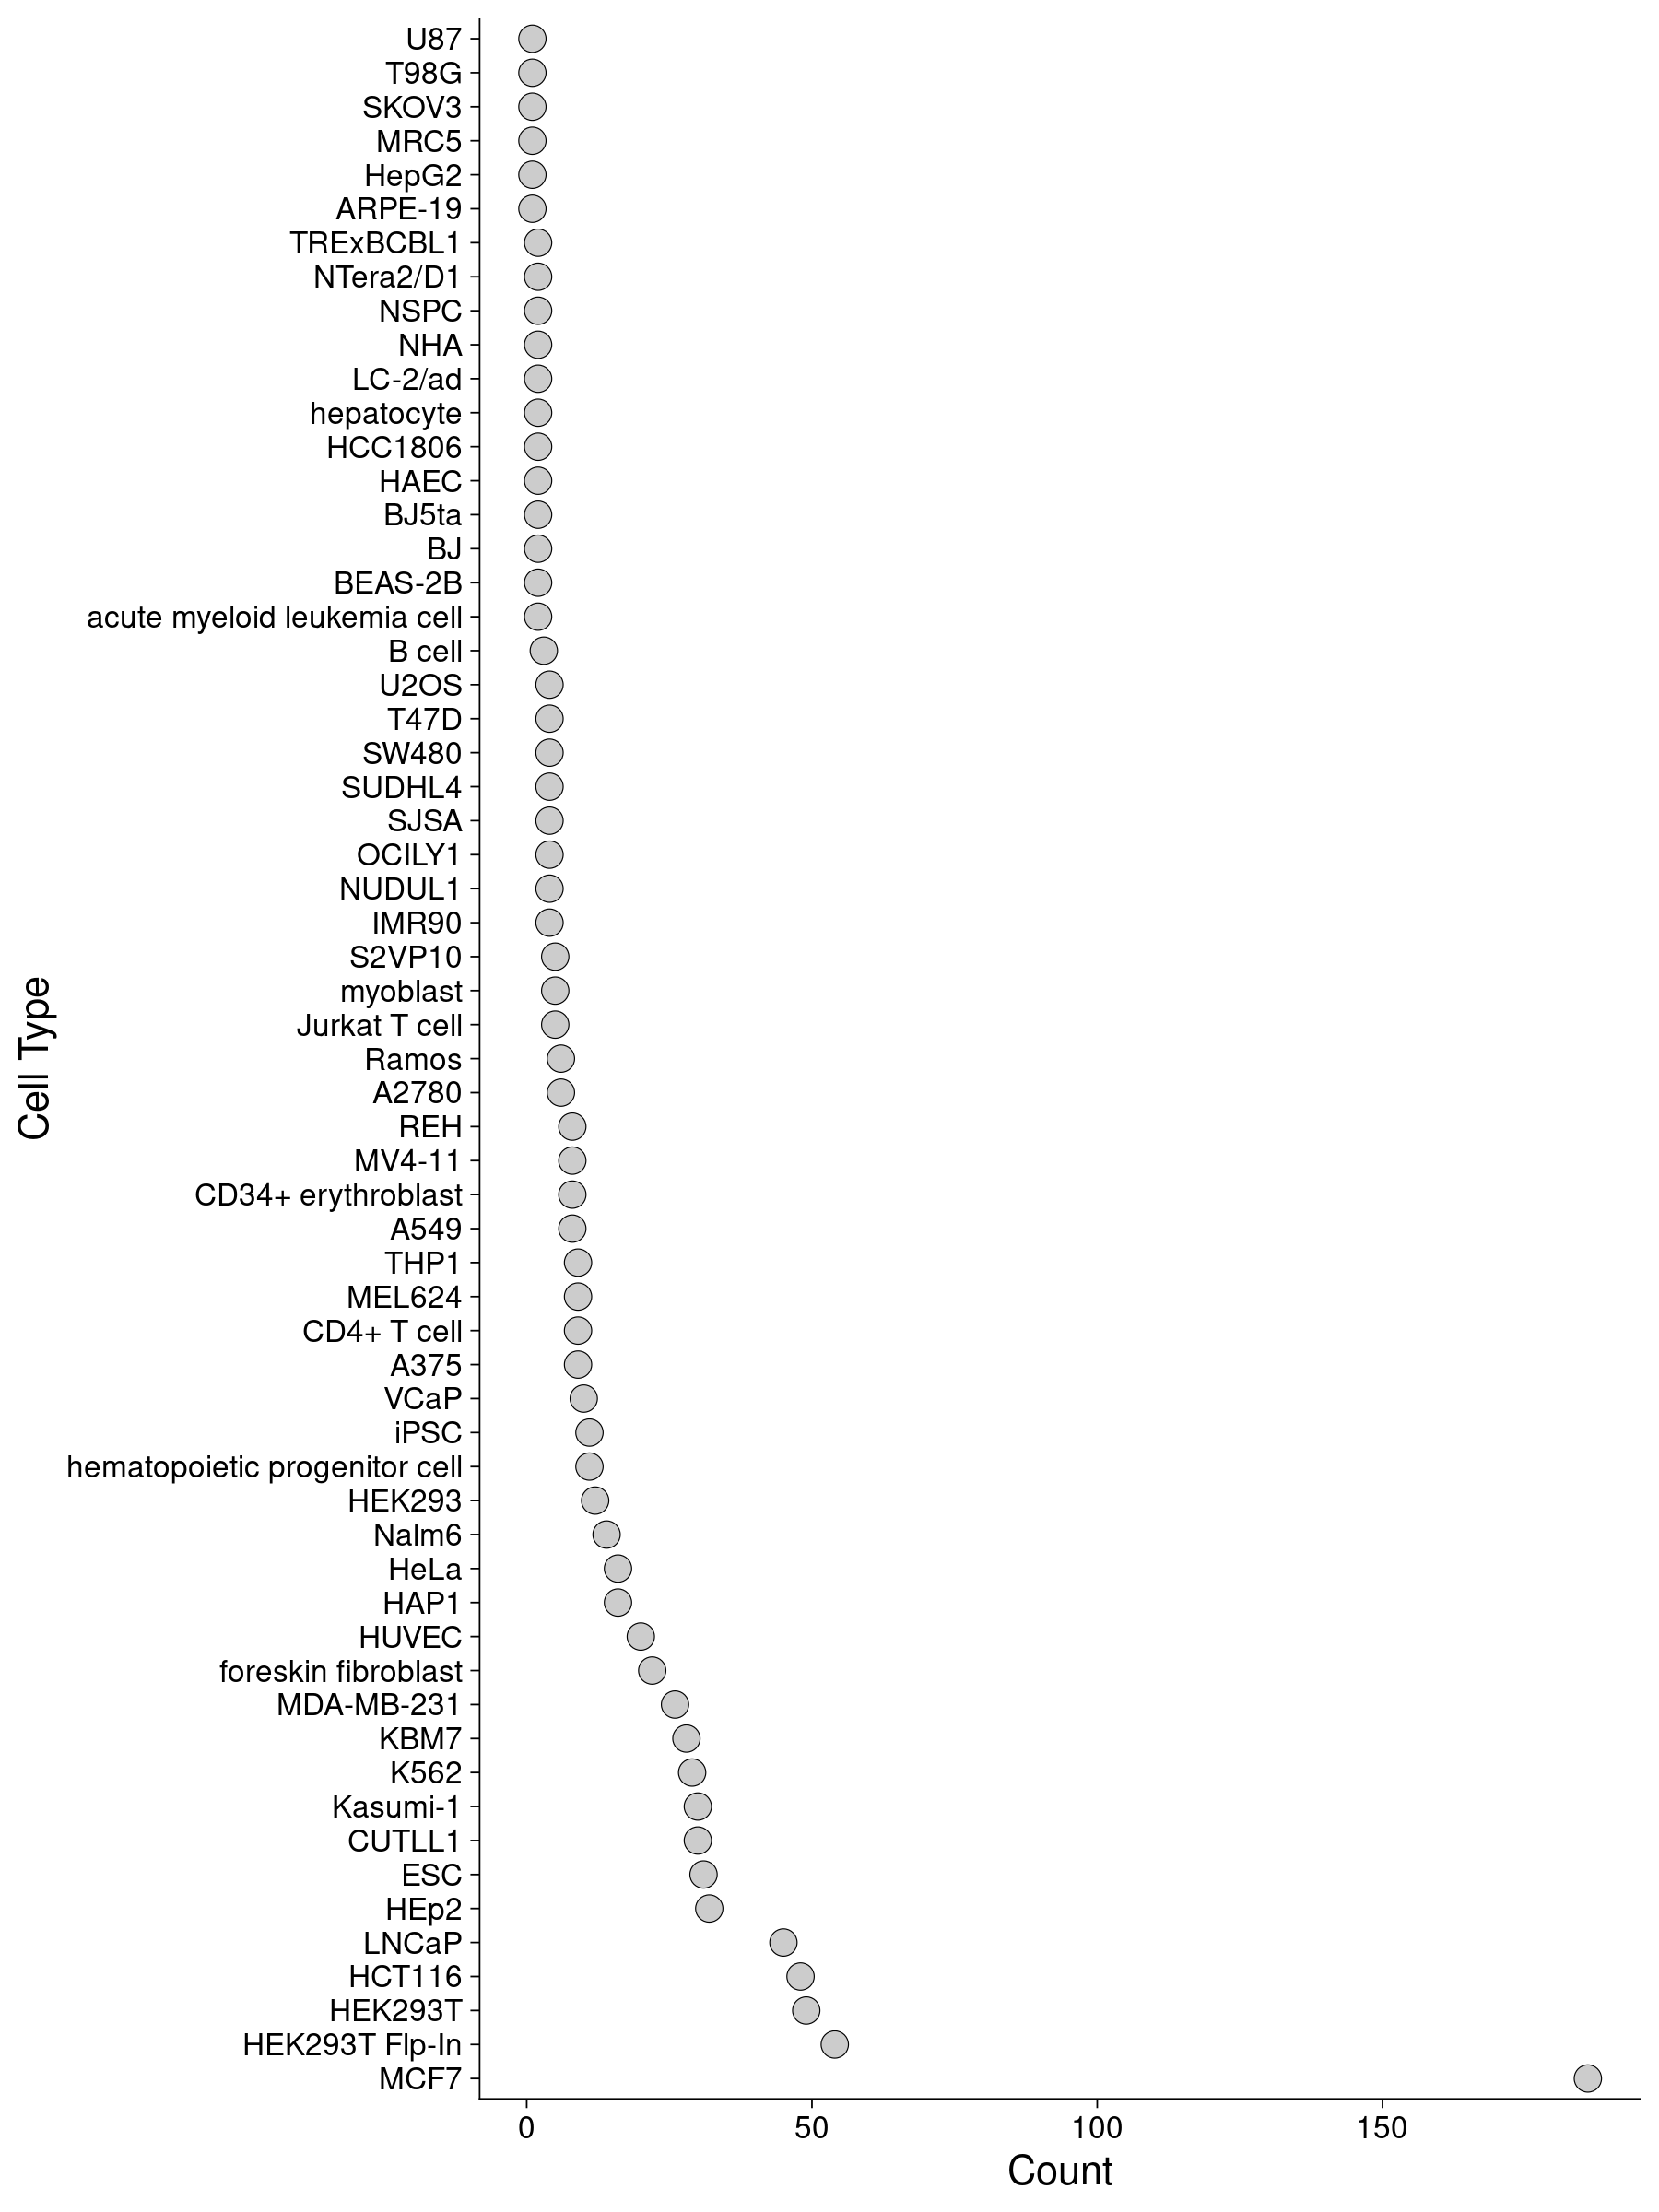

In [8]:
options(repr.plot.width=15, repr.plot.height=20)

c <- ggplot(filtered_samples_celltype, 
            aes(x=reorder(Var1,-Freq), y=Freq)) + 
  geom_point(color="black",
             fill="gray80", 
             shape=21,
            size=8) +
theme_cowplot(24) + 
#ggtitle("Cell types represented in analysis") +
xlab("Cell Type") +
ylab("Count") +
#scale_x_continuous(labels = scales::comma) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 30), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24)) + 
coord_flip()

c

## Tissue types

In [9]:
filtered_samples_tissue <- as.data.frame(table(as.character(metadata_celltype_counted$Tissue)))
filtered_samples_tissue

Var1,Freq
<fct>,<int>
Blood,230
Bone,8
Brain,6
Breast,218
Embryo,31
Eye,1
Heart,2
Intestine,52
Kidney,115


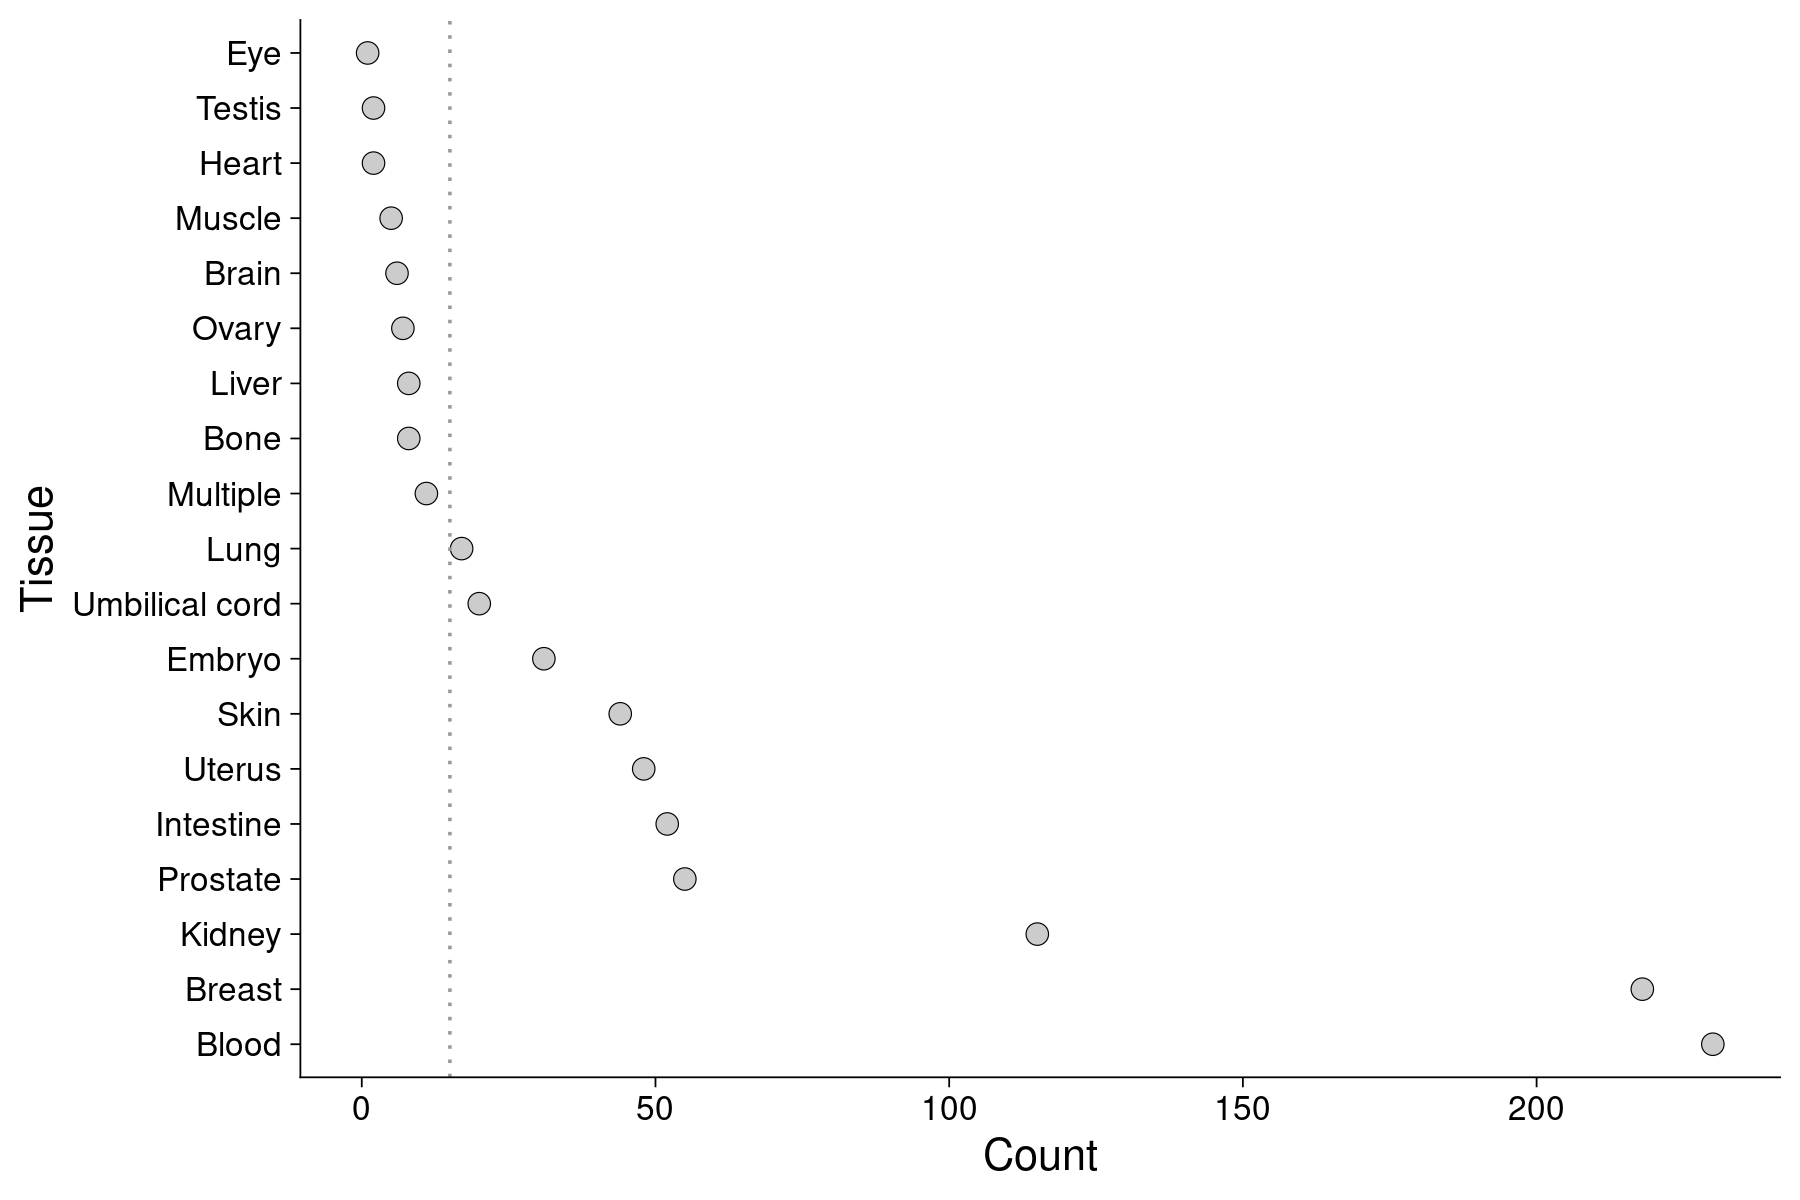

In [10]:
options(repr.plot.width=15, repr.plot.height=10)

t <- ggplot(filtered_samples_tissue, 
            aes(x=reorder(Var1,-Freq), y=Freq)) + 
  geom_point(color="black",
             fill="gray80", 
             shape=21,
            size=6) +
theme_cowplot(24) + 
#ggtitle("Tissues represented in analysis") +
xlab("Tissue") +
ylab("Count") +
geom_hline(yintercept = 15, linetype="dotted", 
                color = "gray60", size=1) +
#scale_x_continuous(labels = scales::comma) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 30), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20),
     legend.title = element_text(size = 26),
     legend.text = element_text(size = 24)) + 
coord_flip()
t

These are the tissues processed for correlation for human samples. This yeilded 10 tissues total.

In [11]:
as.character(subset(filtered_samples_tissue, Freq>15)$Var1)

[1] "Blood"          "Breast"         "Embryo"         "Intestine"     
 [5] "Kidney"         "Lung"           "Prostate"       "Skin"          
 [9] "Umbilical cord" "Uterus"

In [12]:
ggsave(c, width = 15, height = 20,
       filename = "/Users/rusi2317/projects/DBNascent_Analysis/figures/human_cell_types_supplement_figure.pdf", 
       bg = "transparent")

ggsave(t, width = 10, height = 8,
       filename = "/Users/rusi2317/projects/DBNascent_Analysis/figures/human_tissue_types_supplement_figure.pdf", 
       bg = "transparent")


# Session Information

In [13]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] R.utils_2.12.0    R.oo_1.25.0       R.methodsS3_1.8.2 data.table_1.14.2
[5] cowplot_1.1.1     ggplot2_3.3.6    

loaded via a namespace (and not attached):
 [1] pillar_1.8.1      compiler_3.6.0    base64enc_0.1-3   tools_3.6.0      
 [5] digest_0.6.29     uuid_1.1-0        jsonlite_1.8.0    evaluate_0.16    
 [9] lifecycle_1.0.3 